In [ ]:
!pip install tensorflow

In [17]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
%load_ext tensorboard

In [6]:
logdir = 'log'

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [21]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x = train_images,
          y = train_labels,
          epochs = 5,
          validation_data = (test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8963 - loss: 0.3364 - val_accuracy: 0.9831 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9858 - loss: 0.0454 - val_accuracy: 0.9901 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9888 - val_loss: 0.0376
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9918 - val_loss: 0.0248
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9939 - loss: 0.0176 - val_accuracy: 0.9894 - val_loss: 0.0322


In [22]:
y_true = test_labels
y_pred_proba = model.predict(test_images)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [23]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

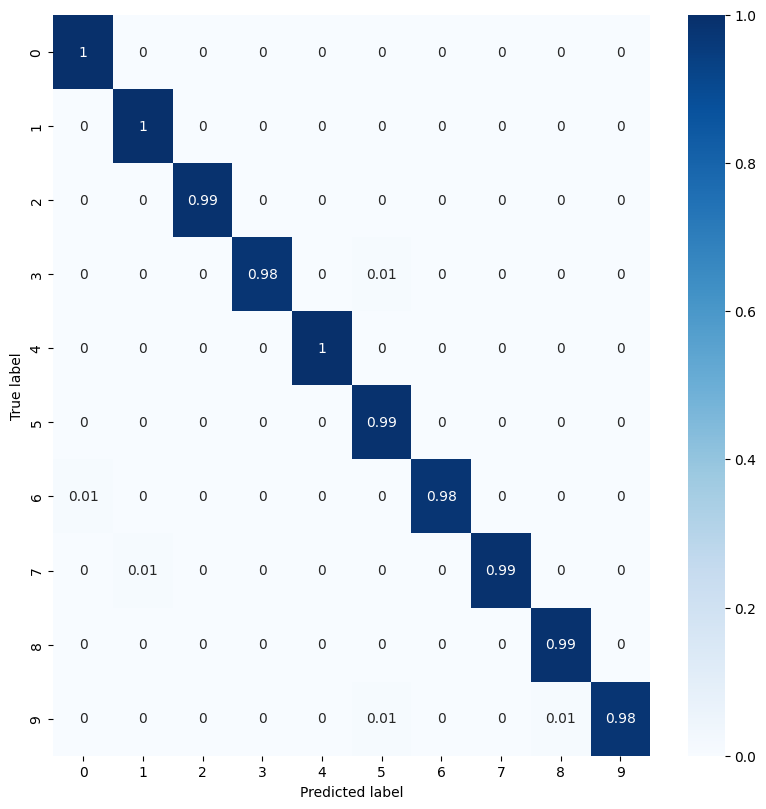

In [28]:
con_mat = tf.math.confusion_matrix(labels = y_true, predictions = y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis = 1)[:, np.newaxis], decimals = 2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize = (8, 8))
sns.heatmap(con_mat_df, annot = True, cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
vp = np.diag(con_mat)
fp = con_mat.sum(axis = 0) - vp
fn = con_mat.sum(axis = 1) - vp
vn = con_mat.sum() - (fp + fn + vp)

print("Verdadeiro Negativos: ", vn)
print("Falso Positivos: ", fp)
print("Falso Negativos: ", fn)
print("Verdadeiro Positivos: ", vp)

Verdadeiro Negativos:  [9008 8846 8963 8985 9009 9089 9038 8962 9014 8980]
Falso Positivos:  [12 19  5  5  9 19  4 10 12 11]
Falso Negativos:  [ 3  1 10 16  4 10 19 15  8 20]
Verdadeiro Positivos:  [ 977 1134 1022  994  978  882  939 1013  966  989]


In [38]:
sensibilidade = vp / (vp + fn)
especificidade = vn / (fp + vn)
acuracia = (vp + vn) / (vp + vn + fp + fn)
precisao = vp / (vp + fp)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

print("Sensibilidade: ", sensibilidade)
print("Especificidade: ", especificidade)
print("Acurácia: ", acuracia)
print("Precisão: ", precisao)
print("F-Score: ", f_score)

Sensibilidade:  [0.99693878 0.99911894 0.99031008 0.98415842 0.99592668 0.98878924
 0.98016701 0.98540856 0.99178645 0.98017839]
Especificidade:  [0.99866962 0.99785674 0.99944246 0.99944383 0.999002   0.99791392
 0.99955762 0.99888542 0.99867051 0.99877655]
Acurácia:  [0.9985 0.998  0.9985 0.9979 0.9987 0.9971 0.9977 0.9975 0.998  0.9969]
Precisão:  [0.98786653 0.98352125 0.99513145 0.99499499 0.99088146 0.97891232
 0.99575822 0.99022483 0.98773006 0.989     ]
F-Score:  [0.99238192 0.99125874 0.99271491 0.98954704 0.99339766 0.98382599
 0.9879011  0.98781082 0.9897541  0.98456944]


In [43]:
for i in range(len(vp)):
    print("Classe {}:".format(i))
    print("Sensibilidade: {:0.2f}".format(sensibilidade[i]))
    print("Especificidade: {:0.2f}".format(especificidade[i]))
    print("Acurácia: {:0.2f}".format(acuracia[i]))
    print("Precisão: {:0.2f}".format(precisao[i]))
    print("F-Score: {:0.2f}".format(f_score[i]))
    print("-" * 20)

Classe 0:
Sensibilidade: 1.00
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-Score: 0.99
--------------------
Classe 1:
Sensibilidade: 1.00
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.98
F-Score: 0.99
--------------------
Classe 2:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 1.00
F-Score: 0.99
--------------------
Classe 3:
Sensibilidade: 0.98
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-Score: 0.99
--------------------
Classe 4:
Sensibilidade: 1.00
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-Score: 0.99
--------------------
Classe 5:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.98
F-Score: 0.98
--------------------
Classe 6:
Sensibilidade: 0.98
Especificidade: 1.00
Acurácia: 1.00
Precisão: 1.00
F-Score: 0.99
--------------------
Classe 7:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precisão: 0.99
F-Score: 0.99
--------------------
Classe 8:
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
Precis

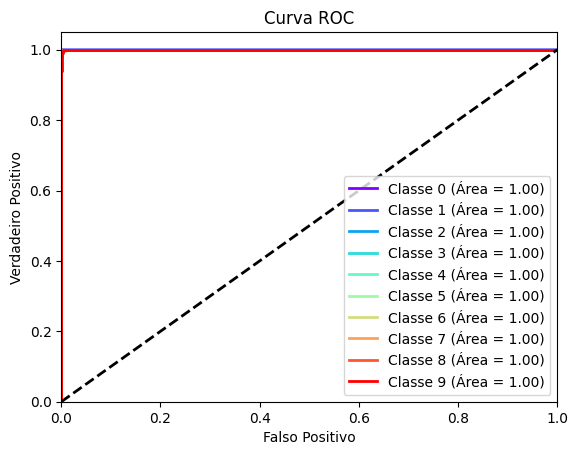

In [51]:
n_classes = len(classes)
y_true_bin = label_binarize(y_true, classes=range(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = "Classe {0} (Área = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()